# XGBoost Notebook

## Quick notebook to practice using xgboost algorithm

### The first section of this notebook will do some data analysis on a dataset for penguins (my favourite animal species, after all). After that I will attempt to predict certain features of the dataset using xgboost algorithm.

Load libraries

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

Load & inspect dataframe

In [105]:
df = pd.read_csv('Datasets/penguins.csv')

In [106]:
df.head(10)

Unnamed: 0 studyName  Sample Number                              Species  \
0           1   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)   
1           2   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)   
2           3   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)   
3           4   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)   
4           5   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)   
5           6   PAL0708              6  Adelie Penguin (Pygoscelis adeliae)   
6           7   PAL0708              7  Adelie Penguin (Pygoscelis adeliae)   
7           8   PAL0708              8  Adelie Penguin (Pygoscelis adeliae)   
8           9   PAL0708              9  Adelie Penguin (Pygoscelis adeliae)   
9          10   PAL0708             10  Adelie Penguin (Pygoscelis adeliae)   

   Region     Island               Stage Individual ID Clutch Completion  \
0  Anvers  Torgersen  Adult, 1 Egg Stage          N1A1               Yes   
1  Anvers  Torgersen  Adult, 1 Egg Stage          N1A2               Yes   
2  Anvers  Torgersen  Adult, 1 Egg Stage          N2A1               Yes   
3  Anvers  Torgersen  Adult, 1 Egg Stage          N2A2               Yes   
4  Anvers  Torgersen  Adult, 1 Egg Stage          N3A1               Yes   
5  Anvers  Torgersen  Adult, 1 Egg Stage          N3A2               Yes   
6  Anvers  Torgersen  Adult, 1 Egg Stage          N4A1                No   
7  Anvers  Torgersen  Adult, 1 Egg Stage          N4A2                No   
8  Anvers  Torgersen  Adult, 1 Egg Stage          N5A1               Yes   
9  Anvers  Torgersen  Adult, 1 Egg Stage          N5A2               Yes   

     Date Egg  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0  2007-11-11                39.1               18.7                181.0   
1  2007-11-11                39.5               17.4                186.0   
2  2007-11-16                40.3               18.0                195.0   
3  2007-11-16                 NaN                NaN                  NaN   
4  2007-11-16                36.7               19.3                193.0   
5  2007-11-16                39.3               20.6                190.0   
6  2007-11-15                38.9               17.8                181.0   
7  2007-11-15                39.2               19.6                195.0   
8  2007-11-09                34.1               18.1                193.0   
9  2007-11-09                42.0               20.2                190.0   

   Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0         3750.0    MALE                NaN                NaN   
1         3800.0  FEMALE            8.94956          -24.69454   
2         3250.0  FEMALE            8.36821          -25.33302   
3            NaN     NaN                NaN                NaN   
4         3450.0  FEMALE            8.76651          -25.32426   
5         3650.0    MALE            8.66496          -25.29805   
6         3625.0  FEMALE            9.18718          -25.21799   
7         4675.0    MALE            9.46060          -24.89958   
8         3475.0     NaN                NaN                NaN   
9         4250.0     NaN            9.13362          -25.09368   

                                Comments  
0         Not enough blood for isotopes.  
1                                    NaN  
2                                    NaN  
3                     Adult not sampled.  
4                                    NaN  
5                                    NaN  
6  Nest never observed with full clutch.  
7  Nest never observed with full clutch.  
8              No blood sample obtained.  
9   No blood sample obtained for sexing.

In [107]:
df.describe()

Unnamed: 0  Sample Number  Culmen Length (mm)  Culmen Depth (mm)  \
count  344.000000     344.000000          342.000000         342.000000   
mean   172.500000      63.151163           43.921930          17.151170   
std     99.448479      40.430199            5.459584           1.974793   
min      1.000000       1.000000           32.100000          13.100000   
25%     86.750000      29.000000           39.225000          15.600000   
50%    172.500000      58.000000           44.450000          17.300000   
75%    258.250000      95.250000           48.500000          18.700000   
max    344.000000     152.000000           59.600000          21.500000   

       Flipper Length (mm)  Body Mass (g)  Delta 15 N (o/oo)  \
count           342.000000     342.000000         330.000000   
mean            200.915205    4201.754386           8.733382   
std              14.061714     801.954536           0.551770   
min             172.000000    2700.000000           7.632200   
25%             190.000000    3550.000000           8.299890   
50%             197.000000    4050.000000           8.652405   
75%             213.000000    4750.000000           9.172123   
max             231.000000    6300.000000          10.025440   

       Delta 13 C (o/oo)  
count         331.000000  
mean          -25.686292  
std             0.793961  
min           -27.018540  
25%           -26.320305  
50%           -25.833520  
75%           -25.062050  
max           -23.787670

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           344 non-null    int64  
 1   studyName            344 non-null    object 
 2   Sample Number        344 non-null    int64  
 3   Species              344 non-null    object 
 4   Region               344 non-null    object 
 5   Island               344 non-null    object 
 6   Stage                344 non-null    object 
 7   Individual ID        344 non-null    object 
 8   Clutch Completion    344 non-null    object 
 9   Date Egg             344 non-null    object 
 10  Culmen Length (mm)   342 non-null    float64
 11  Culmen Depth (mm)    342 non-null    float64
 12  Flipper Length (mm)  342 non-null    float64
 13  Body Mass (g)        342 non-null    float64
 14  Sex                  333 non-null    object 
 15  Delta 15 N (o/oo)    330 non-null    flo

In [109]:
df.isna().sum()

Unnamed: 0               0
studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     11
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               290
dtype: int64

Drop Comments column and fill na values

In [110]:
df.drop('Comments', axis=1, inplace=True)

In [111]:
df.fillna(method='bfill', inplace=True)

In [112]:
df.isna().sum()

Unnamed: 0             0
studyName              0
Sample Number          0
Species                0
Region                 0
Island                 0
Stage                  0
Individual ID          0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

In [113]:
df.nunique()

Unnamed: 0             344
studyName                3
Sample Number          152
Species                  3
Region                   1
Island                   3
Stage                    1
Individual ID          190
Clutch Completion        2
Date Egg                50
Culmen Length (mm)     164
Culmen Depth (mm)       80
Flipper Length (mm)     55
Body Mass (g)           94
Sex                      2
Delta 15 N (o/oo)      330
Delta 13 C (o/oo)      331
dtype: int64

In [114]:
df.drop(['Region', 'Stage'], axis=1, inplace=True) #delete as only 1

Visualisations based on species

<AxesSubplot:xlabel='Species', ylabel='count'>

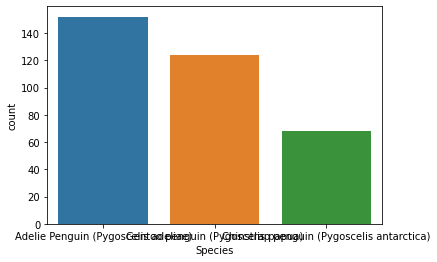

In [115]:
sns.countplot(data=df, x='Species')

<AxesSubplot:xlabel='Species', ylabel='Culmen Length (mm)'>

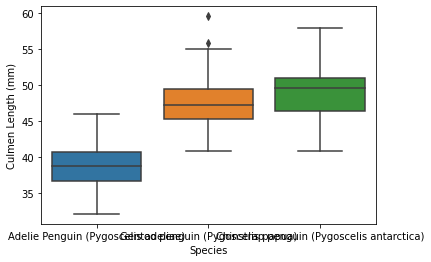

In [116]:
sns.boxplot(data=df, x='Species', y='Culmen Length (mm)')

<AxesSubplot:xlabel='Species', ylabel='Culmen Length (mm)'>

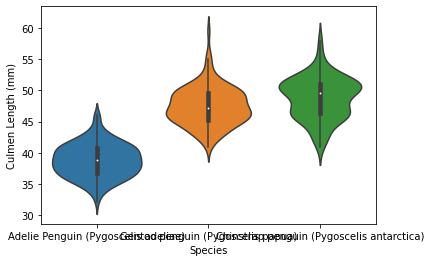

In [117]:
sns.violinplot(data=df, x='Species', y='Culmen Length (mm)')

<AxesSubplot:xlabel='Species', ylabel='Culmen Depth (mm)'>

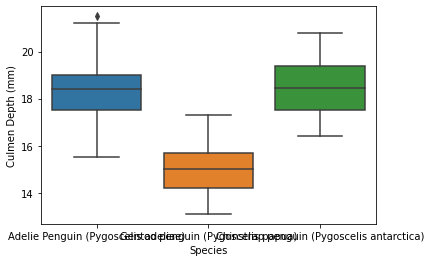

In [118]:
sns.boxplot(data=df, x='Species', y='Culmen Depth (mm)')

<AxesSubplot:xlabel='Species', ylabel='Body Mass (g)'>

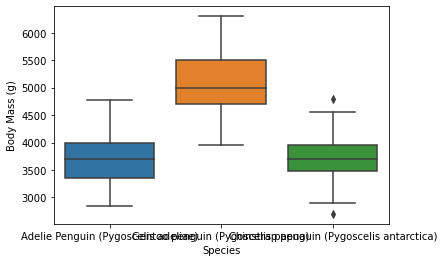

In [119]:
sns.boxplot(data=df, x='Species', y='Body Mass (g)')

Visualisations based on sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

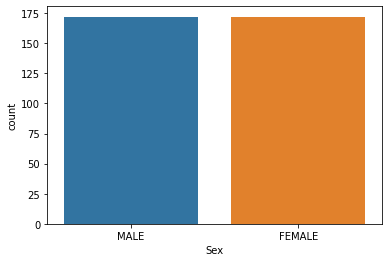

In [120]:
sns.countplot(data=df, x='Sex')

<AxesSubplot:xlabel='Sex', ylabel='Culmen Length (mm)'>

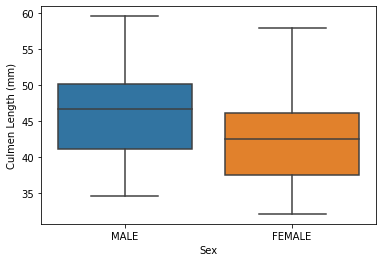

In [121]:
sns.boxplot(data=df, x='Sex', y='Culmen Length (mm)')

<AxesSubplot:xlabel='Species', ylabel='Culmen Length (mm)'>

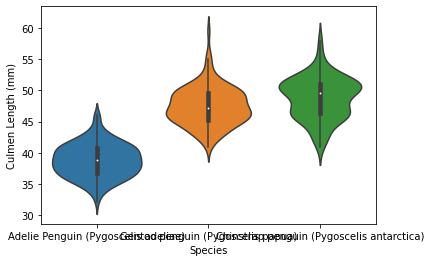

In [122]:
sns.violinplot(data=df, x='Species', y='Culmen Length (mm)')

<AxesSubplot:xlabel='Sex', ylabel='Culmen Depth (mm)'>

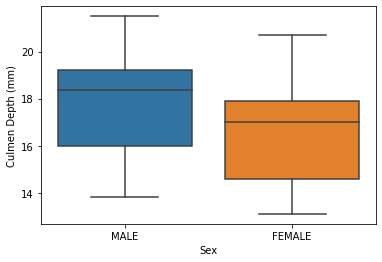

In [123]:
sns.boxplot(data=df, x='Sex', y='Culmen Depth (mm)')

<AxesSubplot:xlabel='Species', ylabel='Body Mass (g)'>

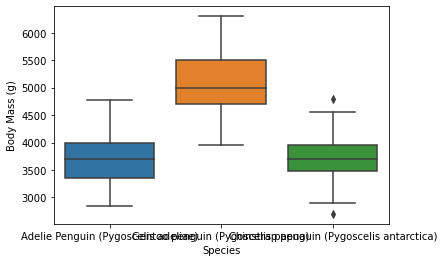

In [124]:
sns.boxplot(data=df, x='Species', y='Body Mass (g)')

Plot the emperical distribution function

In [125]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / n
    return x, y

In [126]:
df.Species.unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Gentoo penguin (Pygoscelis papua)',
       'Chinstrap penguin (Pygoscelis antarctica)'], dtype=object)

In [127]:
x_AP, y_AP = ecdf(df[df.Species == 'Adelie Penguin (Pygoscelis adeliae)']['Culmen Length (mm)'])
x_GP, y_GP = ecdf(df[df.Species == 'Gentoo penguin (Pygoscelis papua)']['Culmen Length (mm)'])
x_CP, y_CP = ecdf(df[df.Species == 'Chinstrap penguin (Pygoscelis antarctica)']['Culmen Length (mm)'])

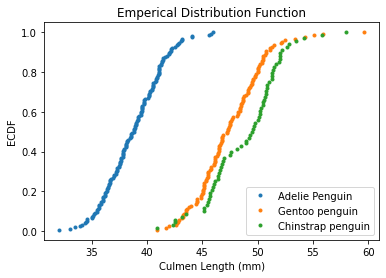

In [128]:
_ = plt.plot(x_AP, y_AP, marker='.', linestyle='none')
_ = plt.plot(x_GP, y_GP, marker='.', linestyle='none')
_ = plt.plot(x_CP, y_CP, marker='.', linestyle='none')
# Label the axes
_ = plt.legend(('Adelie Penguin', 'Gentoo penguin', 'Chinstrap penguin'))
_ = plt.ylabel('ECDF')
_ = plt.xlabel('Culmen Length (mm)')
_ = plt.title('Emperical Distribution Function')
plt.show()

# XGBoost

## Start using xgboost classifier to predict sex of penguin

Drop unnecessary columns

In [129]:
df.columns

Index(['Unnamed: 0', 'studyName', 'Sample Number', 'Species', 'Island',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

In [130]:
df.drop(['Unnamed: 0', 'studyName', 'Sample Number', 'Individual ID', 'Date Egg'], axis=1, inplace=True)

In [131]:
df.head()

Species     Island Clutch Completion  \
0  Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
1  Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
2  Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
3  Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
4  Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0                39.1               18.7                181.0         3750.0   
1                39.5               17.4                186.0         3800.0   
2                40.3               18.0                195.0         3250.0   
3                36.7               19.3                193.0         3450.0   
4                36.7               19.3                193.0         3450.0   

      Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  
0    MALE            8.94956          -24.69454  
1  FEMALE            8.94956          -24.69454  
2  FEMALE            8.36821          -25.33302  
3  FEMALE            8.76651          -25.32426  
4  FEMALE            8.76651          -25.32426

In [147]:
features_df = df.drop('Sex', axis=1)

In [148]:
label_col = ['Sex']
label = df[label_col]

In [149]:
categorical_mask = (features_df.dtypes == object)

In [150]:
categorical_columns = features_df.columns[categorical_mask].tolist()

In [151]:
print(df[categorical_columns].head())

                               Species     Island Clutch Completion
0  Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes
1  Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes
2  Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes
3  Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes
4  Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes


In [152]:
le = LabelEncoder()

In [153]:
features_df = pd.get_dummies(features_df)

In [154]:
label = label.apply(lambda x: le.fit_transform(x))

In [156]:
features_df

Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0                  39.1               18.7                181.0   
1                  39.5               17.4                186.0   
2                  40.3               18.0                195.0   
3                  36.7               19.3                193.0   
4                  36.7               19.3                193.0   
..                  ...                ...                  ...   
339                55.8               19.8                207.0   
340                43.5               18.1                202.0   
341                49.6               18.2                193.0   
342                50.8               19.0                210.0   
343                50.2               18.7                198.0   

     Body Mass (g)  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0            8.94956          -24.69454   
1           3800.0            8.94956          -24.69454   
2           3250.0            8.36821          -25.33302   
3           3450.0            8.76651          -25.32426   
4           3450.0            8.76651          -25.32426   
..             ...                ...                ...   
339         4000.0            9.70465          -24.53494   
340         3400.0            9.37608          -24.40753   
341         3775.0            9.46180          -24.70615   
342         4100.0            9.98044          -24.68741   
343         3775.0            9.39305          -24.25255   

     Species_Adelie Penguin (Pygoscelis adeliae)  \
0                                              1   
1                                              1   
2                                              1   
3                                              1   
4                                              1   
..                                           ...   
339                                            0   
340                                            0   
341                                            0   
342                                            0   
343                                            0   

     Species_Chinstrap penguin (Pygoscelis antarctica)  \
0                                                    0   
1                                                    0   
2                                                    0   
3                                                    0   
4                                                    0   
..                                                 ...   
339                                                  1   
340                                                  1   
341                                                  1   
342                                                  1   
343                                                  1   

     Species_Gentoo penguin (Pygoscelis papua)  Island_Biscoe  Island_Dream  \
0                                            0              0             0   
1                                            0              0             0   
2                                            0              0             0   
3                                            0              0             0   
4                                            0              0             0   
..                                         ...            ...           ...   
339                                          0              0             1   
340                                          0              0             1   
341                                          0              0             1   
342                                          0              0             1   
343                                          0              0             1   

     Island_Torgersen  Clutch Completion_No  Clutch Completion_Yes  
0                   1                     0                      1  
1                   1                     0                      1  
2

In [157]:
X = features_df.values
y = label.values

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

In [ ]:
xg_cl.fit(X_train, y_train)

In [162]:
preds = xg_cl.predict(X_test)

In [163]:
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 34.608696


In [165]:
churn_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

In [166]:
params = {"objective":"reg:logistic", "max_depth":3}

In [167]:
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, 
                  nfold=3, num_boost_round=5, 
                  metrics="error", as_pandas=True, seed=123)

In [172]:
print(cv_results)
print('--------')
print('Accuracy: '+str((1-cv_results["test-error-mean"]).iloc[-1]))

   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.092758         0.013555         0.149108        0.022439
1          0.089125         0.015819         0.149148        0.020931
2          0.069088         0.002490         0.123786        0.031933
3          0.072731         0.002672         0.127409        0.027913
4          0.069088         0.002490         0.120163        0.032811
--------
Accuracy: 0.8798373333333334


### Now onto a regression model, lets try and predict the culmen length